## Calculus

### Introduction

As of 2020, the A-level syllabus includes Calculus which
https://www.cambridgeinternational.org/Images/415060-2020-2022-syllabus.pdf
describes as:

> Calculus: this is a fundamental element which describes change in dynamic situations and underlines the links between functions and graphs.

In practice this often means:

- taking limits of functions;
- differentiating functions;
- integrating functions.

Here we will see how to instruct a computer to carry out these techniques.

## Tutorial

We will solve the following problem using a computer to assist with the technical aspects:


---

Consider the function \\(f(x)= \frac{24 x \left(a - 4 x\right) + 2 \left(a - 8 x\right) \left(b - 4 x\right)}{\left(b - 4 x\right)^{4}}\\)

1. Given that \\(\frac{df}{dx}|_{x=0}=0\\), \\(\frac{d^2f}{dx^2}|_{x=0}=-1\\) and that \\(b>0\\) find the values of \\(a\\) and \\(b\\).
2. For the specific values of \\(a\\) and \\(b\\) find:
    1. \\(\lim_{x\to 0}f(x)\\);
    2. \\(\lim_{x\to \infty}f(x)\\);
    3. \\(\int f(x) dx\\);
    4. \\(\int_{5}^{20} f(x) dx\\).

---

Sympy is once again the library we will use for this.

We will start by creating a variable `expression` that has the value of the expression of \\(f(x)\\):

In [2]:
import sympy as sym

x = sym.Symbol("x")
a = sym.Symbol("a")
b = sym.Symbol("b")
expression = (2 * (12 * x * (a - 4 * x) + (a - 8 * x) * (b - 4 * x))) / (
    (b - 4 * x) ** 4
)
expression

(24*x*(a - 4*x) + 2*(a - 8*x)*(b - 4*x))/(b - 4*x)**4

now we can will use `sympy.diff` to calculate the derivative. This tool takes two inputs: 

- the first is the expression we are differentiating. Essentially this is the numerator of \\(\frac{df}{dx}\\).
- the first is the variable we are differentiating for. Essentially this is the denominator of \\(\frac{df}{dx}\\).

**Note** that we have imported `import sympy as sym` so we are going to write `sym.diff`:

In [3]:
derivative = sym.diff(expression, x)
derivative

(16*a - 16*b - 64*x)/(b - 4*x)**4 + 16*(24*x*(a - 4*x) + 2*(a - 8*x)*(b - 4*x))/(b - 4*x)**5

Let us factorise that to make it slightly clearer:

In [4]:
sym.factor(derivative)

16*(-3*a*b - 12*a*x + b**2 + 16*b*x + 16*x**2)/(-b + 4*x)**5

We will now create the first equation, which is obtained by substituting \\(x=0\\) in to the value of the derivative and equating that to \\(\pi\\):

In [5]:
first_equation = sym.Eq(derivative.subs({x: 0}), 0)
first_equation

Eq(32*a/b**4 + (16*a - 16*b)/b**4, 0)

We will factor that equation:

In [6]:
sym.factor(first_equation)

Eq(16*(3*a - b)/b**4, 0)

Now we are going to create the second equation, substituting \\(x=0\\) in to the value of the second derivative. We calculate the second derivative by passing a third (optional) input to `sym.diff`:

In [7]:
second_derivative = sym.diff(expression, x, 2)
second_derivative

64*(-1 - 8*(-a + b + 4*x)/(b - 4*x) + 10*(12*x*(a - 4*x) + (a - 8*x)*(b - 4*x))/(b - 4*x)**2)/(b - 4*x)**4

We equate this expression to \\(-1\\):

In [8]:
second_equation = sym.Eq(second_derivative.subs({x: 0}), -1)
second_equation

Eq(64*(10*a/b - 1 - 8*(-a + b)/b)/b**4, -1)

Now to solve the first equation to obtain a value for \\(a\\):

In [9]:
sym.solveset(first_equation, a)

FiniteSet(b/3)

Now to substitute that value for \\(a\\) and solve the second equation for \\(b\\):

In [10]:
second_equation = second_equation.subs({a: b / 3})
second_equation

Eq(-192/b**4, -1)

In [11]:
sym.solveset(second_equation, b)

FiniteSet(-2*sqrt(2)*3**(1/4), 2*sqrt(2)*3**(1/4), -2*sqrt(2)*3**(1/4)*I, 2*sqrt(2)*3**(1/4)*I)

In [12]:
sym.root(192, 4)

2*sqrt(2)*3**(1/4)

Recalling the question we know that \\(b>0\\) thus: \\(b = 2\sqrt{2}\sqrt[4]{3}\\) and \\(a=\frac{2\sqrt{2}\sqrt[4]{3}}{3}\\).

We will substitute these values back and finish the question:

In [13]:
expression = expression.subs(
    {a: 2 * sym.sqrt(2) * sym.root(3, 4) / 3, b: 2 * sym.sqrt(2) * sym.root(3, 4)}
)
expression

(24*x*(-4*x + 2*sqrt(2)*3**(1/4)/3) + 2*(-8*x + 2*sqrt(2)*3**(1/4)/3)*(-4*x + 2*sqrt(2)*3**(1/4)))/(-4*x + 2*sqrt(2)*3**(1/4))**4

**Note** that we are using the `sym.root` command for the generic \\(n\\)th root. 

We can confirm our findings:

In [14]:
sym.diff(expression, x).subs({x: 0})

0

In [15]:
sym.diff(expression, x, 2).subs({x: 0})

-1

Now we will calculate the limits using `sym.limit`, these takes 3 inputs:

- The expression we are taking the limit of.
- The variable that is changing.
- The value that the variable is tending towards.

In [16]:
sym.limit(expression, x, 0)

sqrt(3)/36

In [17]:
sym.limit(expression, x, sym.oo)

0

Now we are going to calculate the **indefinite** integral using `sympy.integrate`. This tool takes 2 inputs as:

- the first is the expression we're integrating. This is the \\(f\\) in \\(\int_a^b f dx\\).
- the second is the remaining information needed to calculate the integral: \\(x\\).

In [18]:
sym.factor(sym.integrate(expression, x))

x*(6*x - sqrt(2)*3**(1/4))/(12*(4*x**3 - 6*sqrt(2)*3**(1/4)*x**2 + 6*sqrt(3)*x - sqrt(2)*3**(3/4)))

If we want to calculate a **definite** integral then instead of passing the single variable we pass a tuple which contains the variable as well as the bounds of integration:

In [19]:
sym.factor(sym.integrate(expression, (x, 5, 20)))

-5*(-5000*sqrt(2)*3**(1/4) - 1200*sqrt(3) + 75*sqrt(2)*3**(3/4) + 119997)/(2*(-32000 - 120*sqrt(3) + sqrt(2)*3**(3/4) + 2400*sqrt(2)*3**(1/4))*(-500 - 30*sqrt(3) + sqrt(2)*3**(3/4) + 150*sqrt(2)*3**(1/4)))

### How to


#### Calculate the derivative of an expression.

We can calculate the derivative of an expression using `sym.diff(<expression>, <variable>, [<degree>])`.

For example to compute \\(\frac{d (4 x ^ 3 + 2 x + 1}{dx}\\):

In [24]:
x = sym.Symbol("x")
expression = 4 * x ** 3 + 2 * x + 1
sym.diff(expression, x)

12*x**2 + 2

To compute the second derivative: \\(\frac{d ^ 2 (4 x ^ 3 + 2 x + 1}{dx ^ 2}\\)

In [25]:
sym.diff(expression, x, 2)

24*x

#### Calculate the indefinite integral of an expression.

We can calculate the indefinite integral of an expression using `sym.integrate(<expression>, <variable>)`.

For example to compute \\(\int 4x^3 + 2x + 1 dx\\):

In [27]:
sym.integrate(expression, x)

x**4 + x**2 + x

#### Calculate the definite integral of an expression.

We can calculate the definite integral of an expression using `sym.integrate(<expression>, (<variable>, <lower_bound>, <upper_bound>))`.

For example to compute \\(\int_0^4 4x^3 + 2x + 1 dx\\):

In [30]:
sym.integrate(expression, (x, 0, 4))

276

#### Use \\(\infty\\)

In sympy we can access \\(\infty\\) using `sym.oo`:

In [31]:
sym.oo

oo

#### Calculate limits

We can calculate limits using `sym.limit(<expression>, <variable>, <value>)`.

For example to compute \\(\lim_{h \to 0} \frac{4(x - h)^3 + 2(x - h) + 1  - 4x^3 - 2x - 1}{h}\\):

In [37]:
h = sym.Symbol("h")
expression = (4 * x ** 3 + 2 * x + 1 - 4 * (x - h) ** 3 - 2 * (x - h) - 1) / h
sym.limit(expression, h, 0)

12*x**2 + 2

### Exercises

**After** completing the tutorial attempt the following exercises.

**If you are not sure how to do something, have a look at the "How To" section.**

1. For each of the following functions calculate \\(\frac{df}{dx}\\), \\(\frac{d^2f}{dx^2}\\) and \\(\int f(x) dx\\).
    1. \\(f(x) = x\\)
    2. \\(f(x) = x ^(1/3)\\)
    3. \\(f(x) = 2 x (x - 3) (\sin(x) - 5)\\)
    4. \\(f(x) = \frac{3  x ^ 3 + 6 \sqrt{x} + 3}{3  x ^ {1 / 4}}\\)
2. Consider the function \\(f(x)=2x+1\\). By differentiating *from first principles* show that \\(f'(x)=2\\).
3. Consider the second derivative \\(f''(x)=6x+4\\) of some cubic function \\(f(x)\\).
    1. Find \\(f'(x)\\)
    2. You are given that \\(f(0)=10\\) and \\(f(1)=13\\), find \\(f(x)\\).
    3. Find all the stationary points of \\(f(x)\\) and determine their nature.
4. Consider the function \\(f(x)=\frac{2}{3}x ^ 3 + b x ^ 2 + 2 x + 3\\), where \\(b\\) is some undetermined coefficient.
    1. Find \\(f'(x)\\) and \\(f''(x)\\)
    2. You are given that \\(f(x)\\) has a stationary point at \\(x=2\\). Use this information to find \\(b\\).
    3. Find the coordinates of the other stationary point.
    4. Determine the nature of both stationary points.
5. Consider the functions \\(f(x)=-x^2+4x+4x\\) and \\(g(x)=-2x^3+5x^2-2x-1\\).
    1. Create a variable `turning_points` which has value the turning points of \\f(x)\\).
    2. Create variable `intersection_points` which has value of the points where \\(f(x)\\) and \\(g(x)\\) intersect.
    3. Using your answers to parts 2., calculate the area of the region between \\(f\\) and \\(g\\). Assign this value to a variable `area_of_shaded_region`.

### References

#### How can I plot a function

It is possible to plot a function using Sympy using the `sym.plot` function:

```
sym.plot(f(x))
```

So for example, here is a plot of \\(f(x)=x^2 + 3x + 1\\):

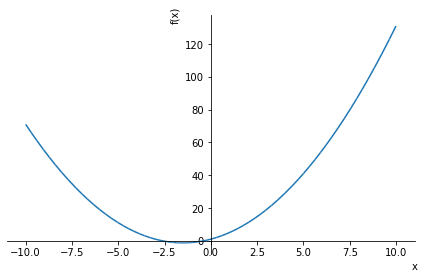

In [43]:
sym.plot(x ** 2 + 3 * x + 1);

It is possible to specify the x limits and combine it with other plots:

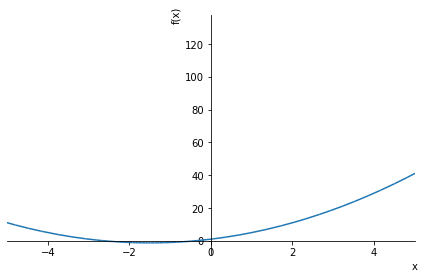

In [44]:
sym.plot(x ** 2 + 3 * x + 1, xlim=(-5, 5));

**This plotting solution is fine it you want to take a look at a function quickly but it is not recommended.** The main library for plotting is called `matplotlib` and we will see how to use that at a later date.

- Here is the Sympy documentation for plotting: https://docs.sympy.org/latest/modules/plotting.html
- Here is a the official matplotlib documentation: https://matplotlib.org